In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 6)

# Датасет

## Wine

URL: https://archive.ics.uci.edu/dataset/109/wine

Эти данные являются результатом химического анализа вин, выращенных в одном и том же регионе Италии, но полученных из трех разных сортов. В ходе анализа было определено количество 13 компонентов, содержащихся в каждом из трех типов вин.

**Признаки**

1) Alcohol – содержание алкоголя в вине
2) Malic acid – уровень яблочной кислоты
3) Ash – содержание минеральных веществ в вине, оставшихся после сжигания
4) Alcalinity of ash – уровень щелочности минеральных веществ в золе
5) Magnesium – содержание магния в вине
6) Total phenols – общее содержание фенольных соединений
7) Flavanoids – содержание флаваноидов, которые являются подгруппой фенольных соединений
8) Nonflavanoid phenols – нефлаваноидные фенолы
9) Proanthocyanins – проантоцианидины
10) Color intensity –  интенсивность цвета
11) Hue – оттенок цвета
12) OD280/OD315 of diluted wines – отношение оптической плотности при длинах волн 280 нм и 315 нм
13) Proline – cодержание аминокислоты пролина
14) **Class**  – целевая переменная, один из трех сортов вина (0,1,2)


## EDA

In [3]:
feature_names = [
    "Class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

In [4]:
raw_data = pd.read_csv('./data/wine/wine.data', header=None, names=feature_names)

In [5]:
raw_data.shape

(178, 14)

In [6]:
raw_data.sample(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
92,2,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495
108,2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
144,3,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
155,3,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725


Все признаки вещественные, без пропусков

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [8]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


### Распределения признаков

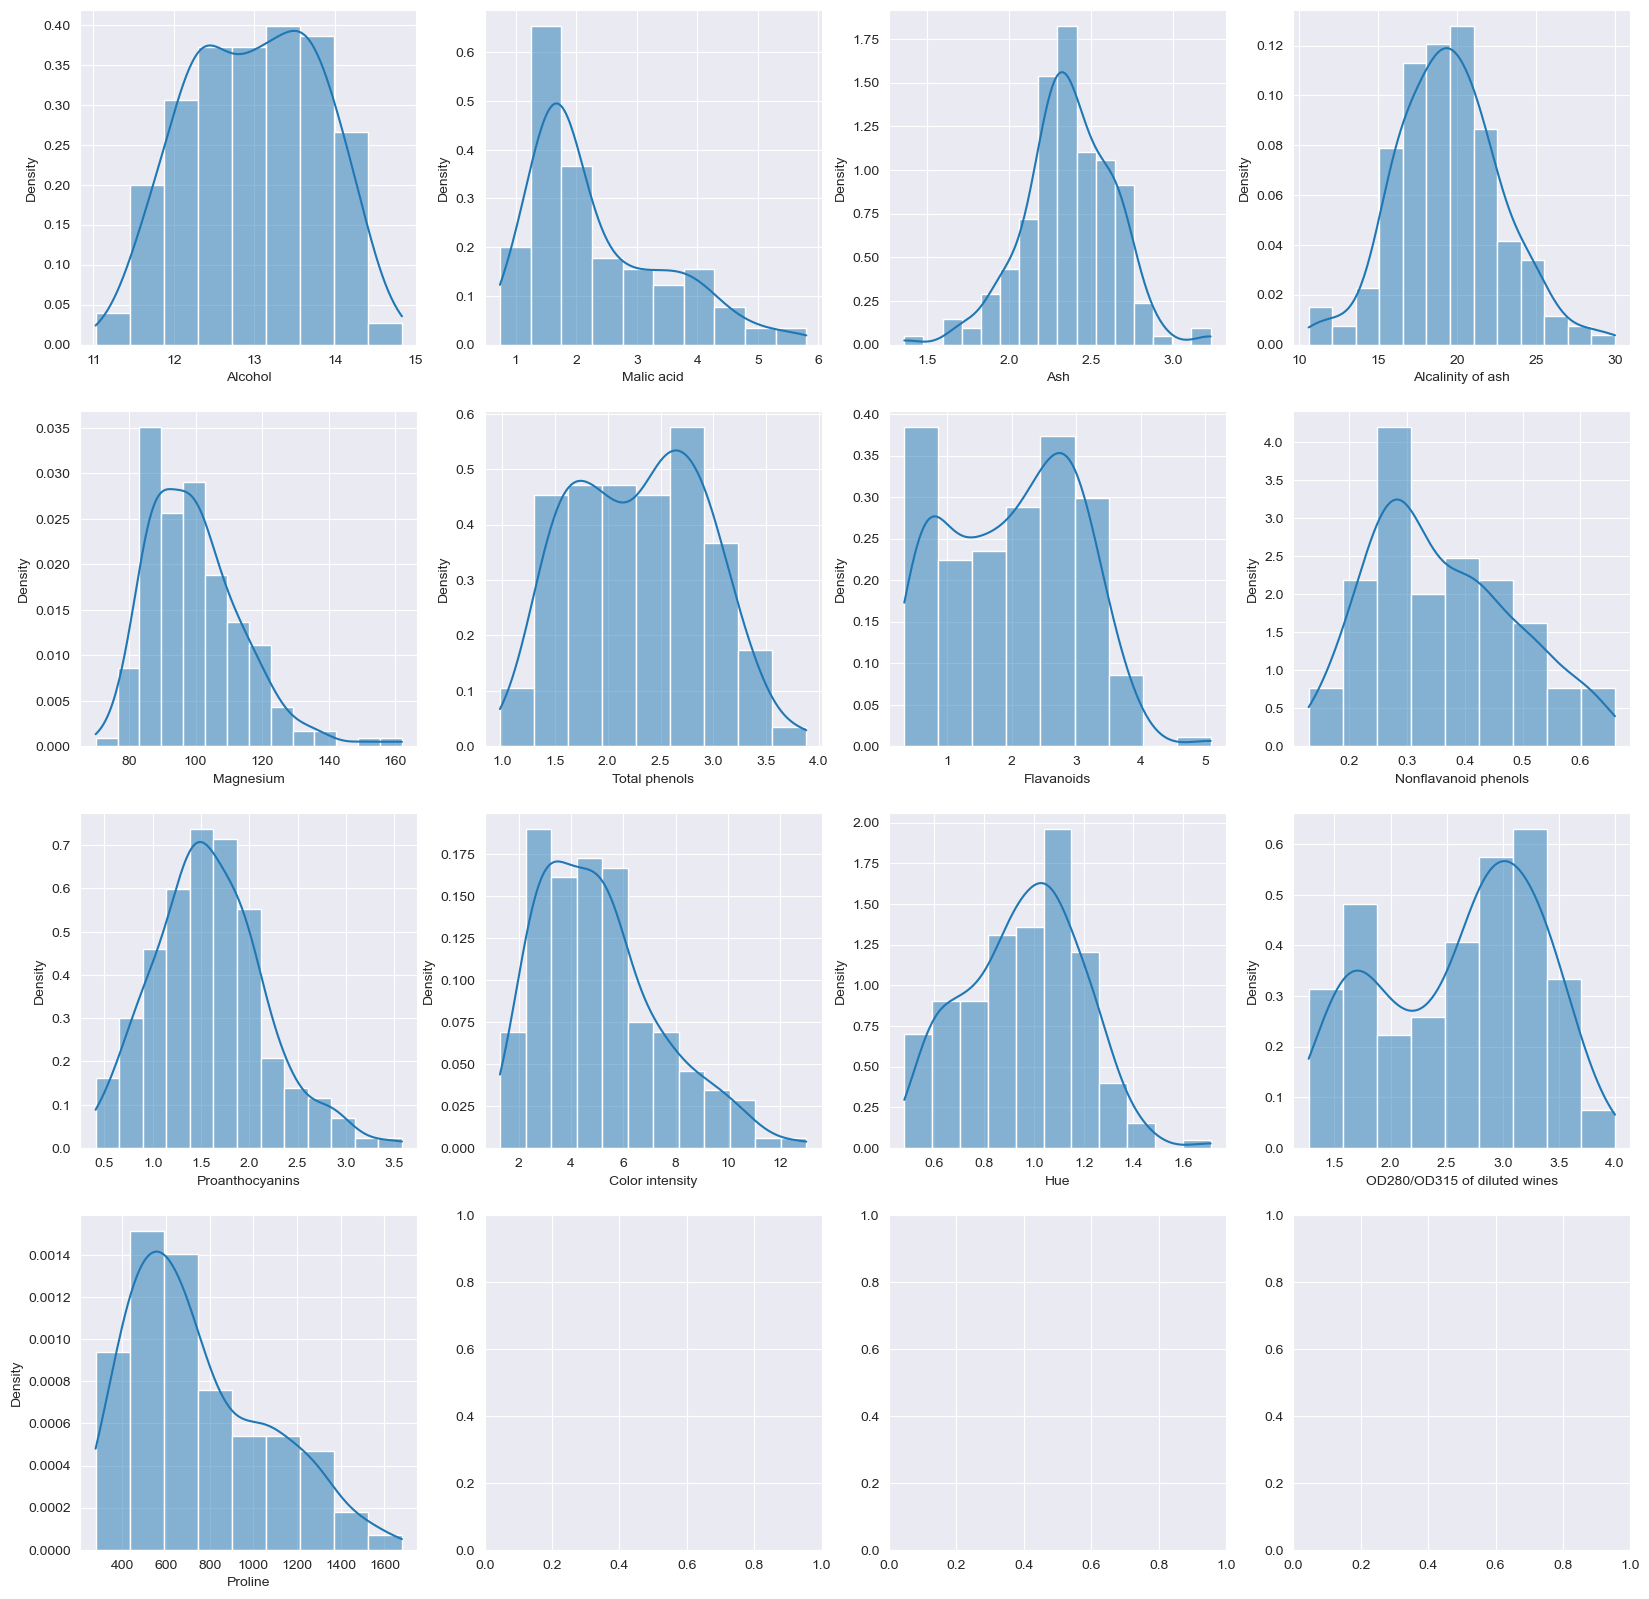

In [9]:
f, ax = plt.subplots(4, 4, figsize=(20, 20))

i = j = 0
for column in raw_data.columns[1:]:
    if j == 4:
        j = 0
        i += 1

    sns.histplot(raw_data[column], ax=ax[i, j], kde=True, stat="density")

    j += 1

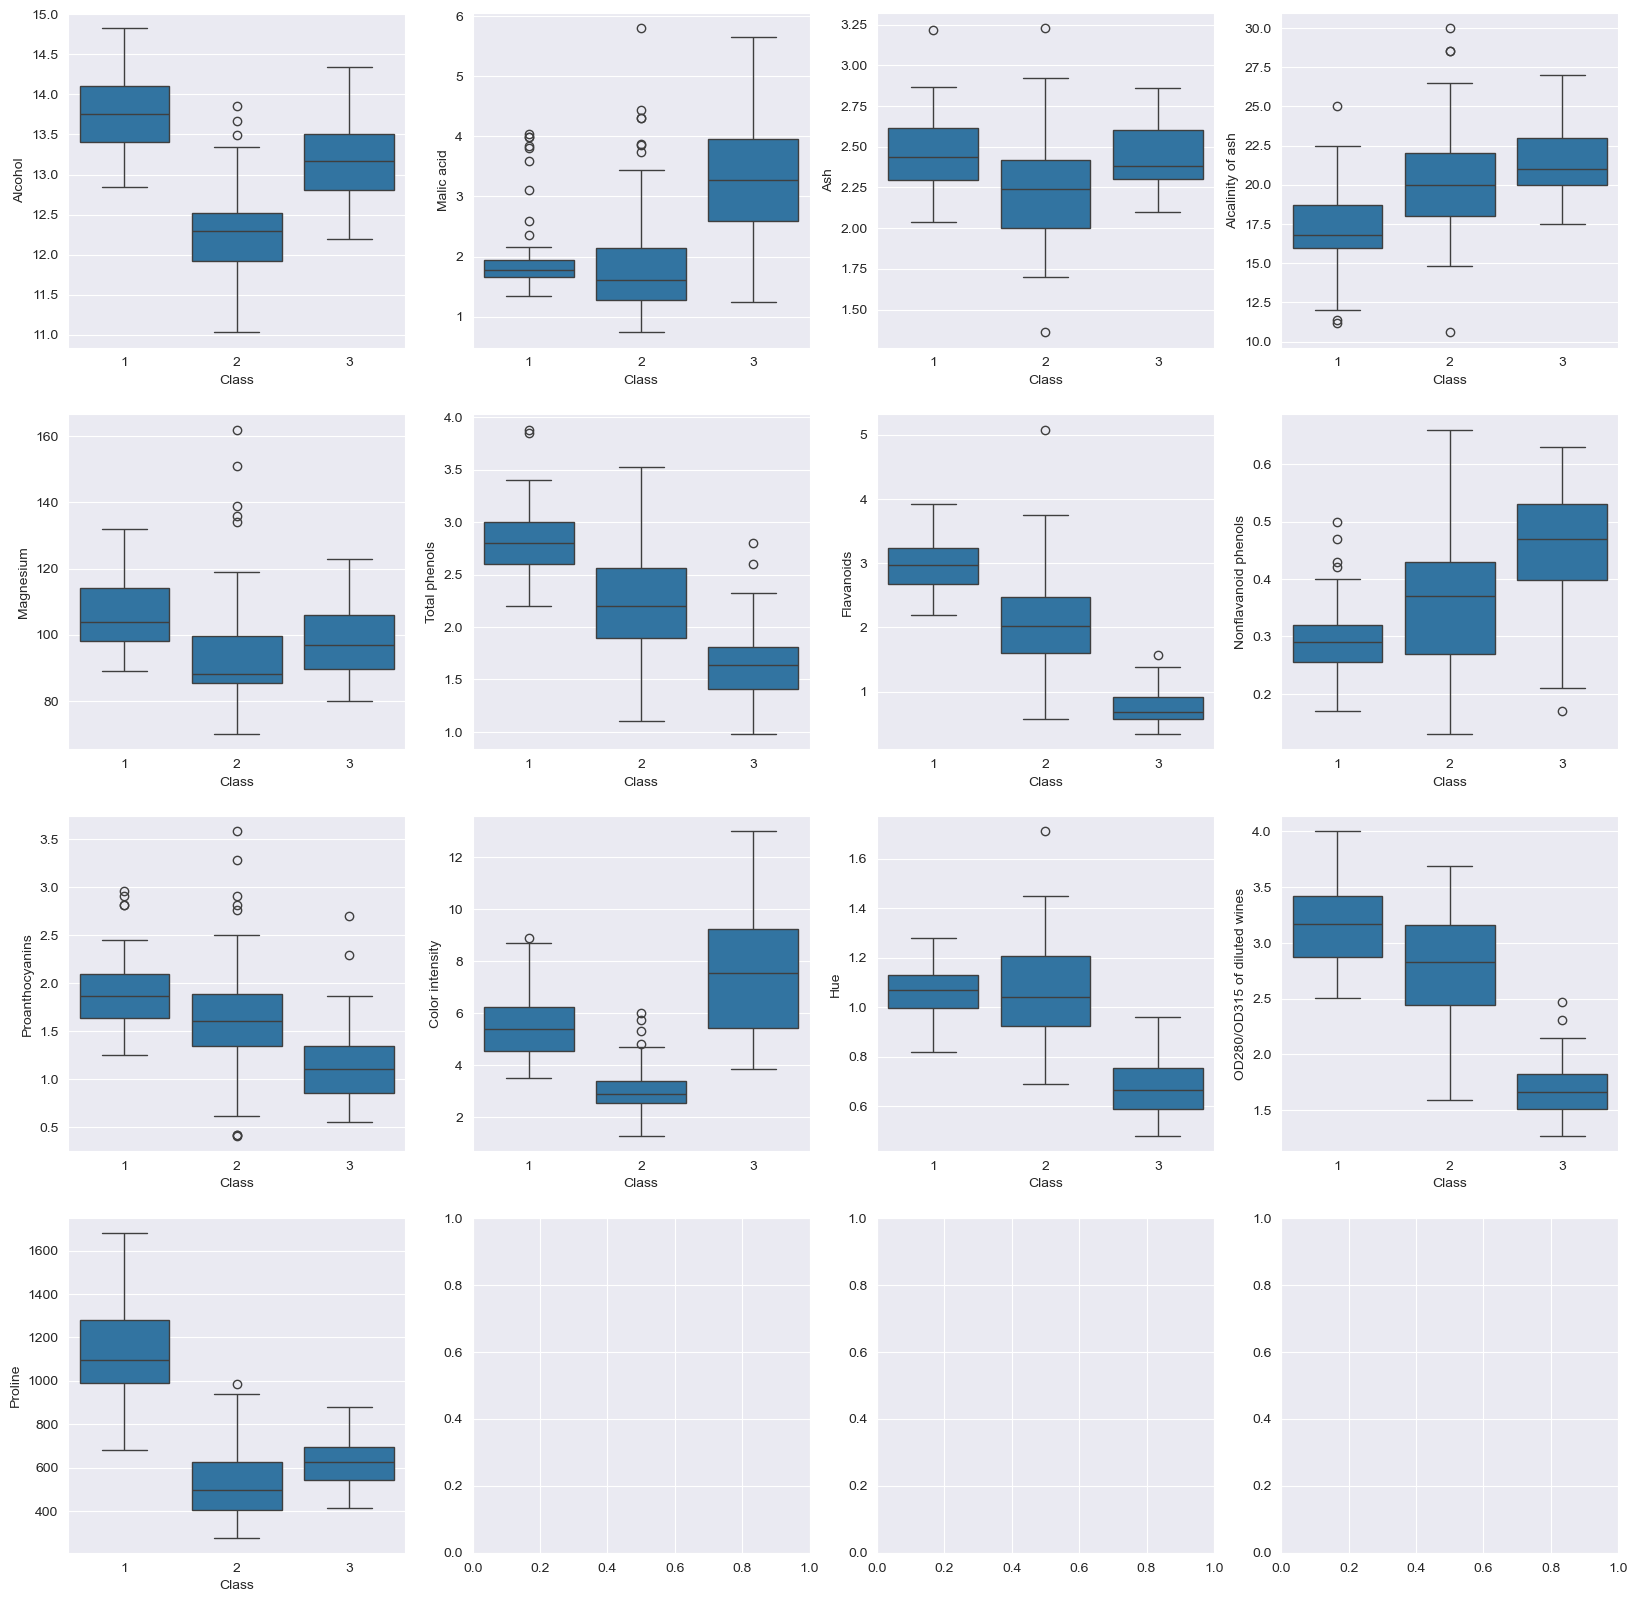

In [10]:
f, ax = plt.subplots(4, 4, figsize=(20, 20))

i = j = 0
for column in raw_data.columns[1:]:
    if j == 4:
        j = 0
        i += 1

    sns.boxplot(raw_data, x='Class', y=column, ax=ax[i, j])

    j += 1

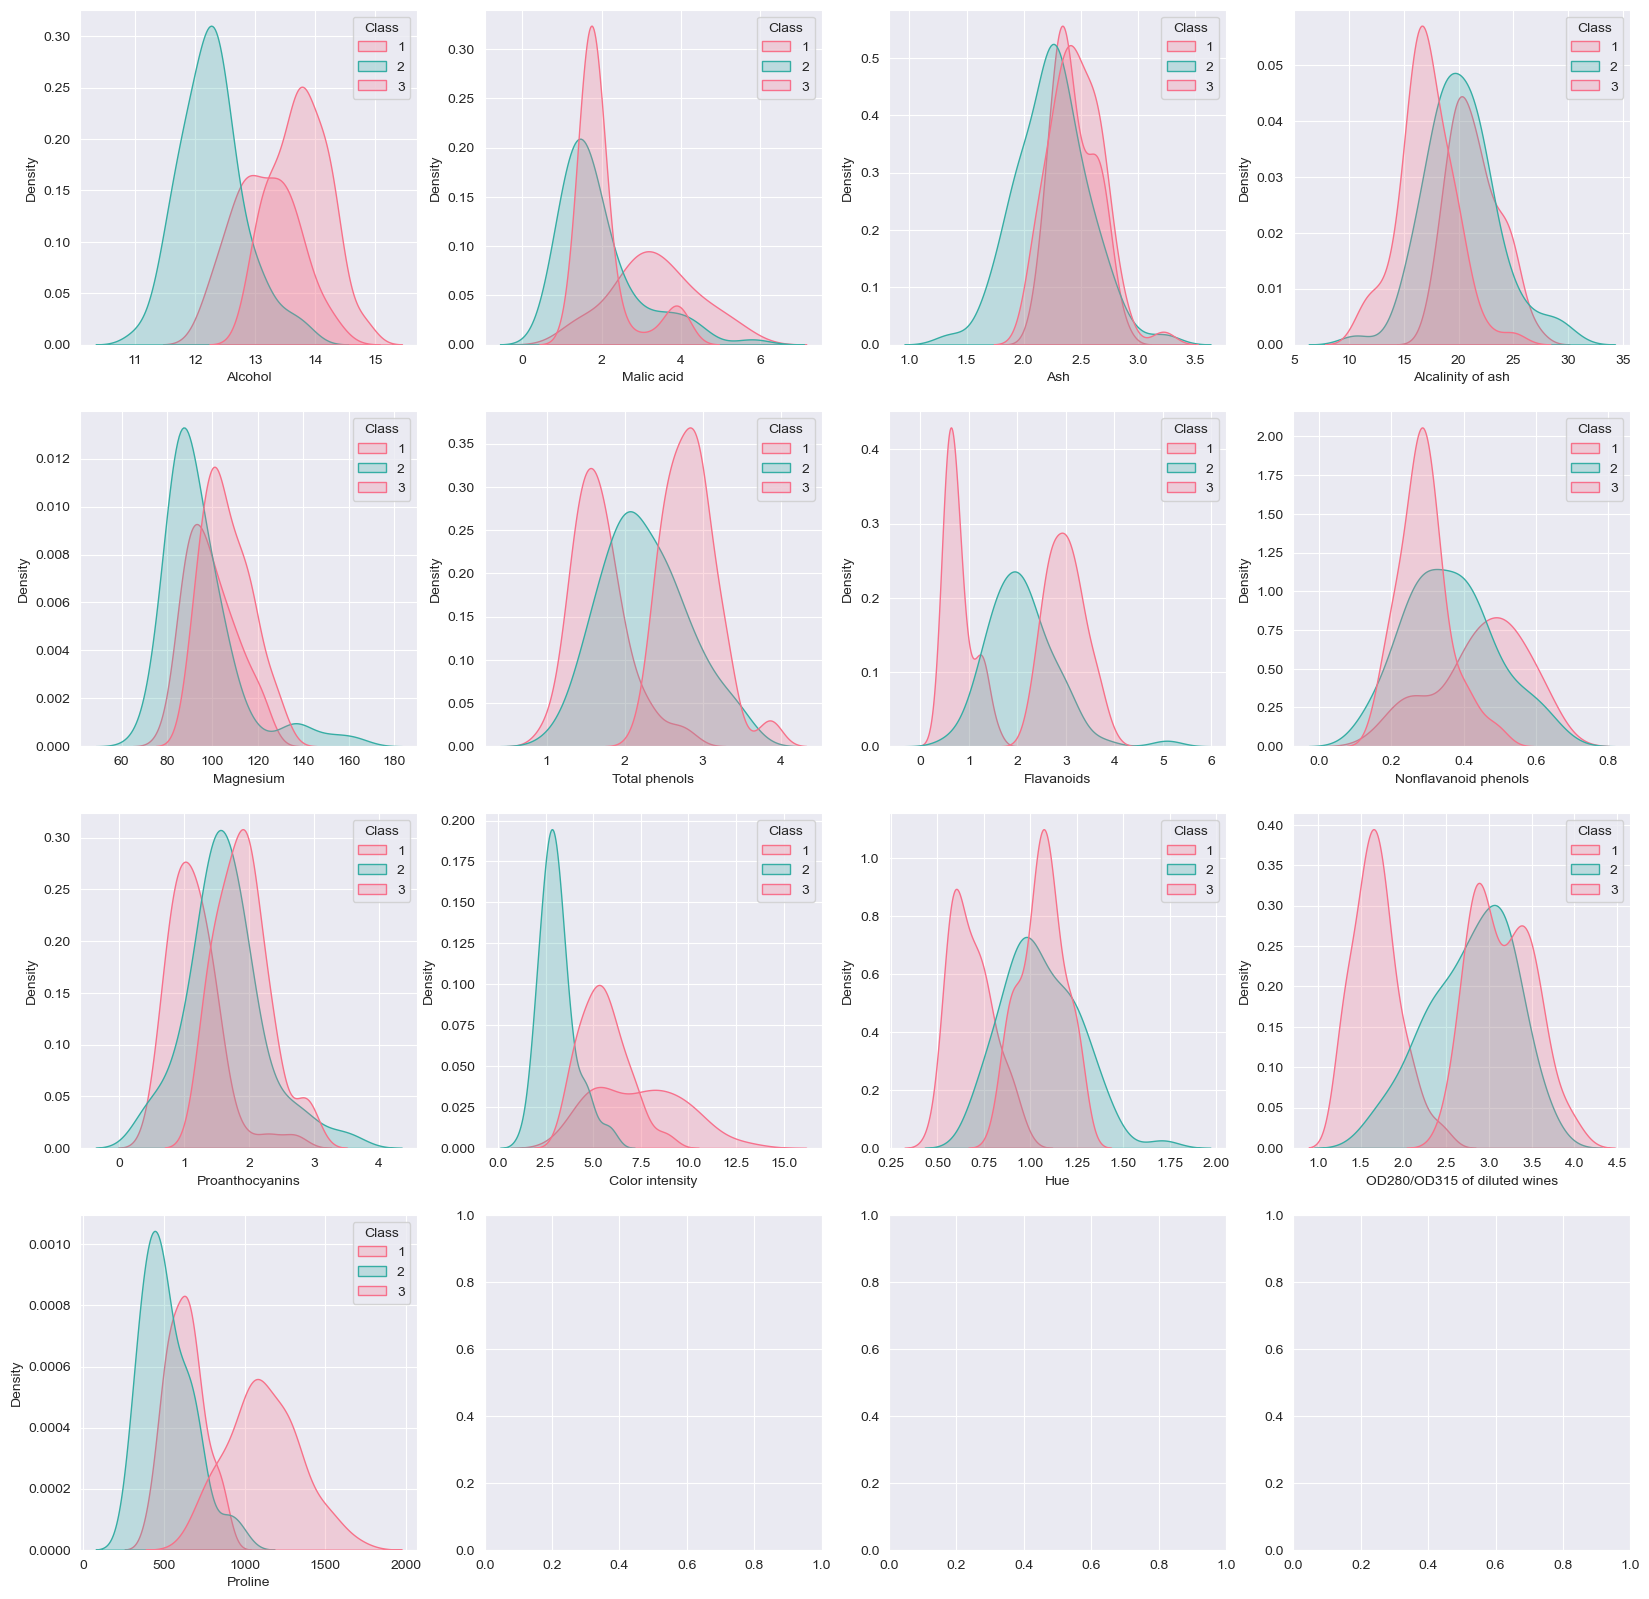

In [11]:
f, ax = plt.subplots(4, 4, figsize=(20, 20))

i = j = 0
for column in raw_data.columns[1:]:
    if j == 4:
        j = 0
        i += 1

    sns.kdeplot(raw_data, hue='Class', x=column, fill=True, palette="husl", ax=ax[i, j])

    j += 1

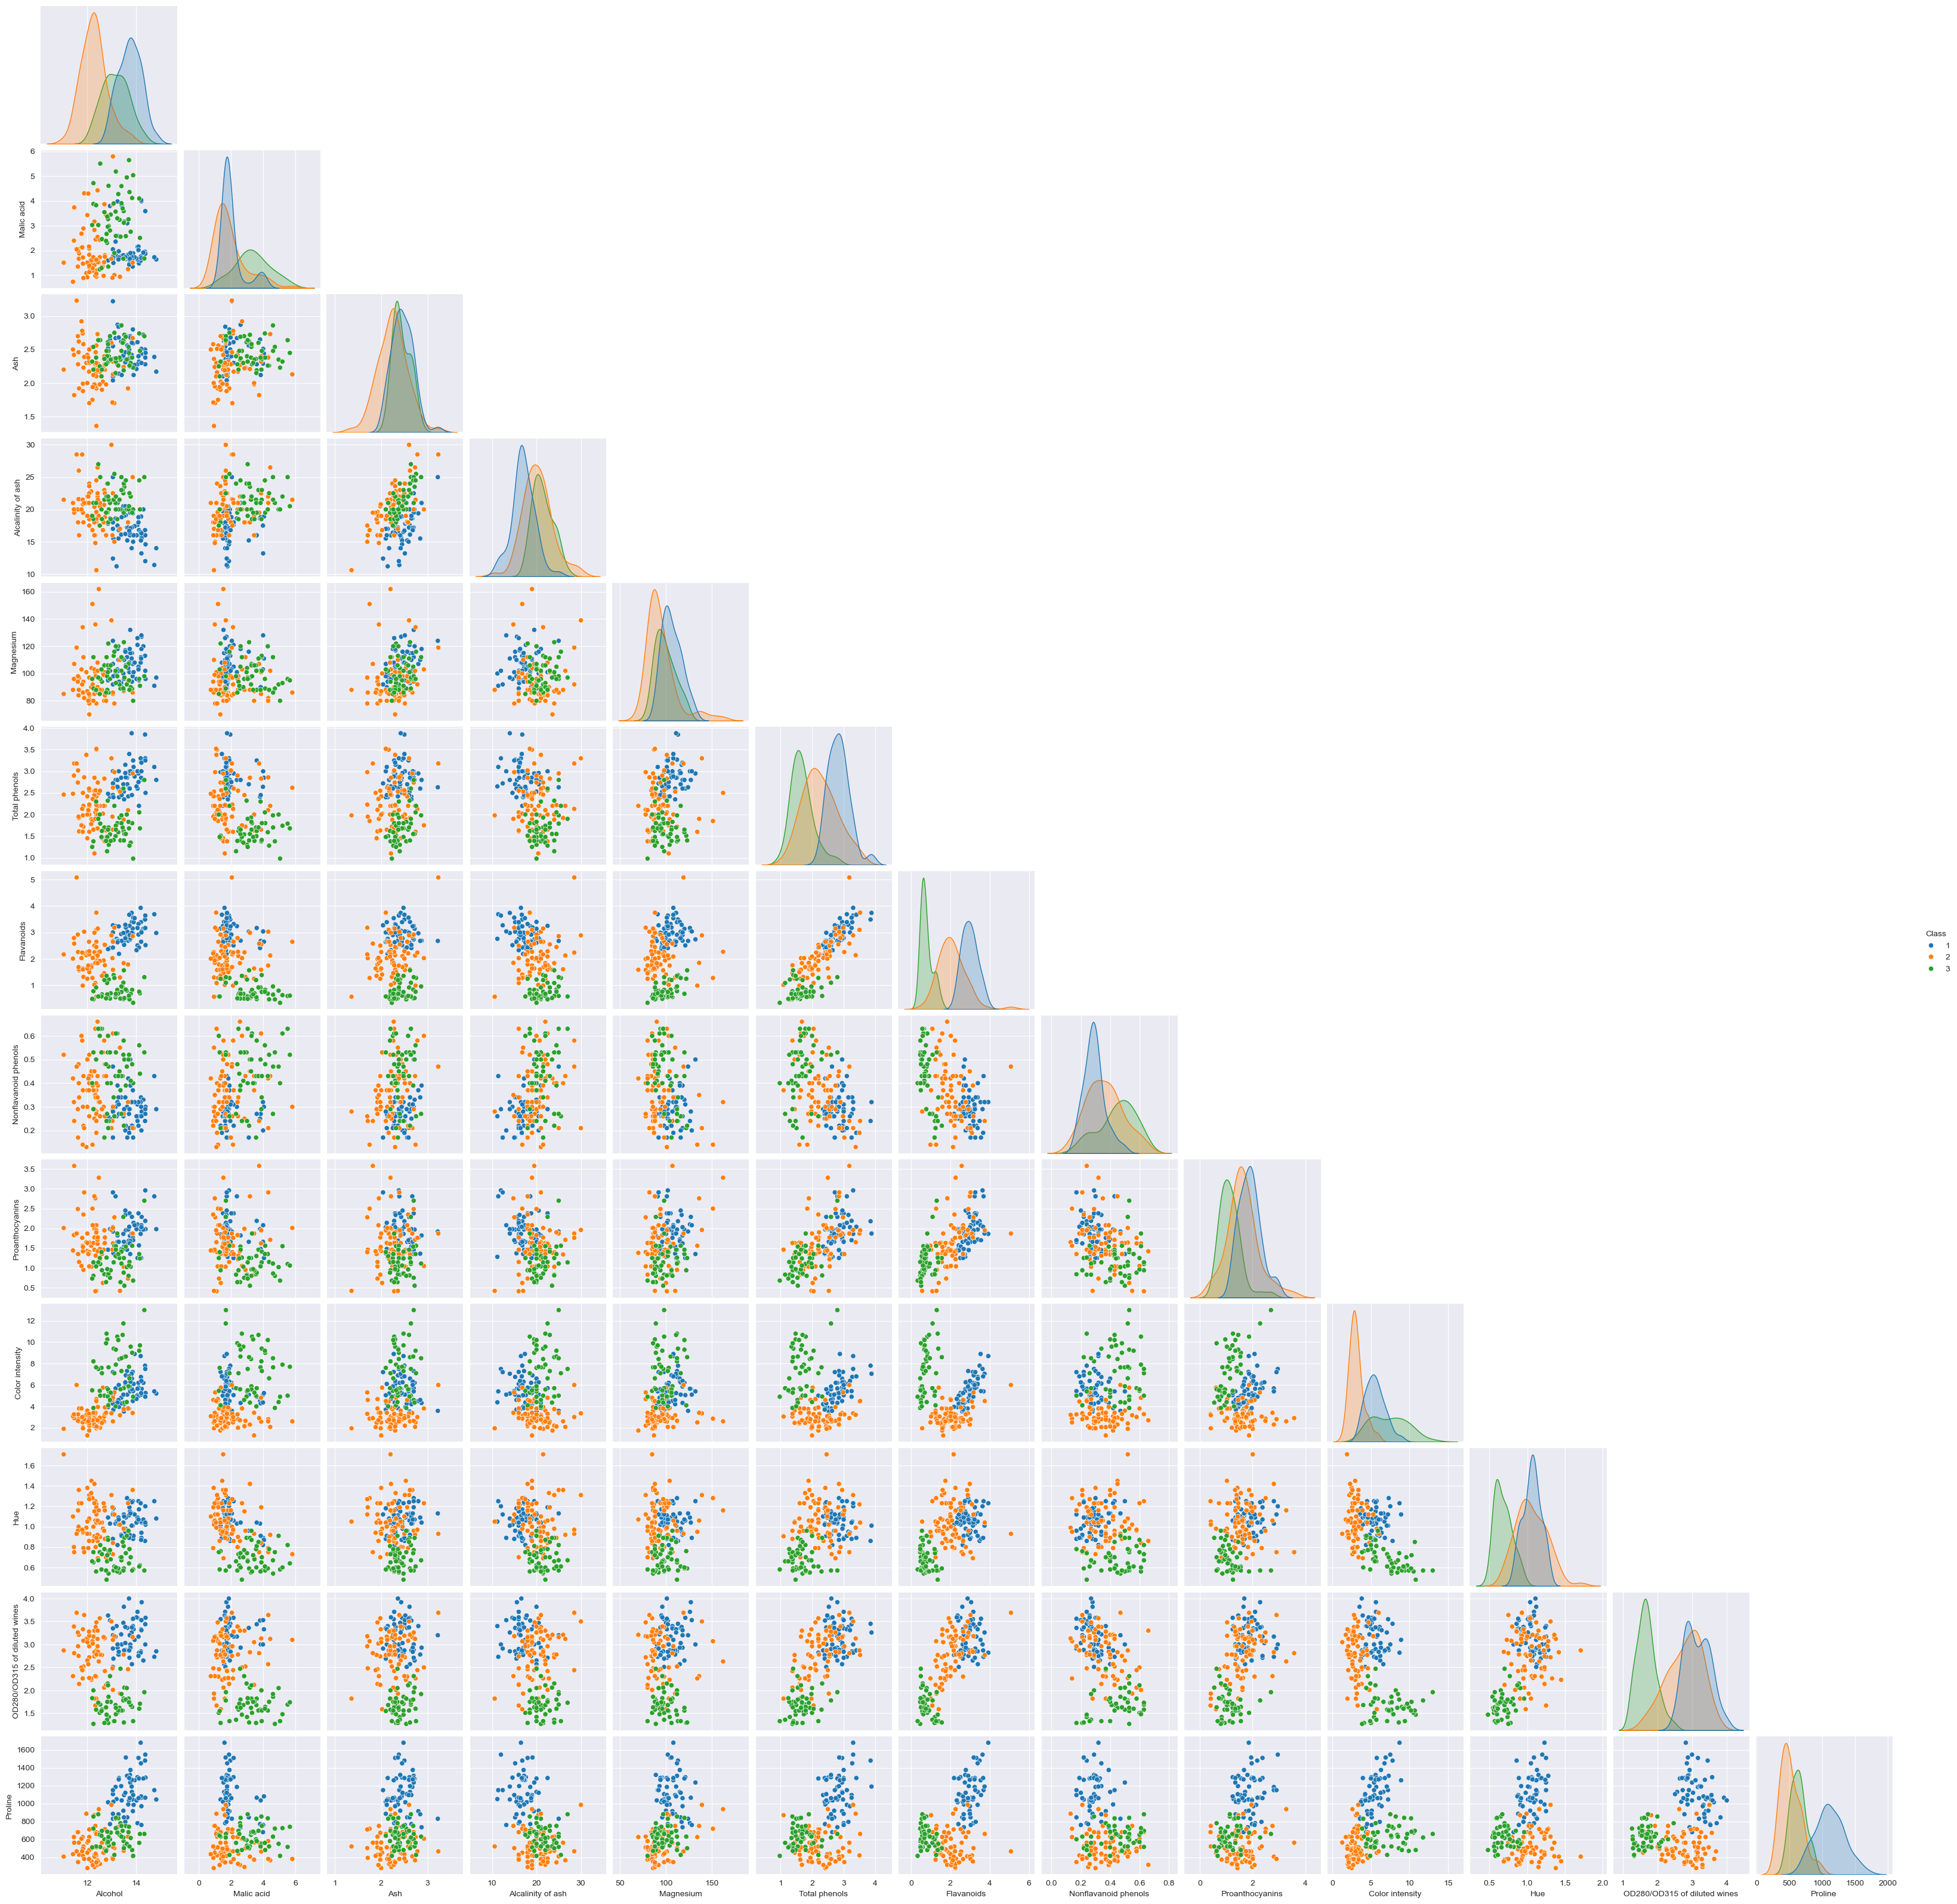

In [12]:
sns.pairplot(raw_data,
             hue='Class',
             palette="tab10",
             corner=True)

### Heatmap

<Axes: >

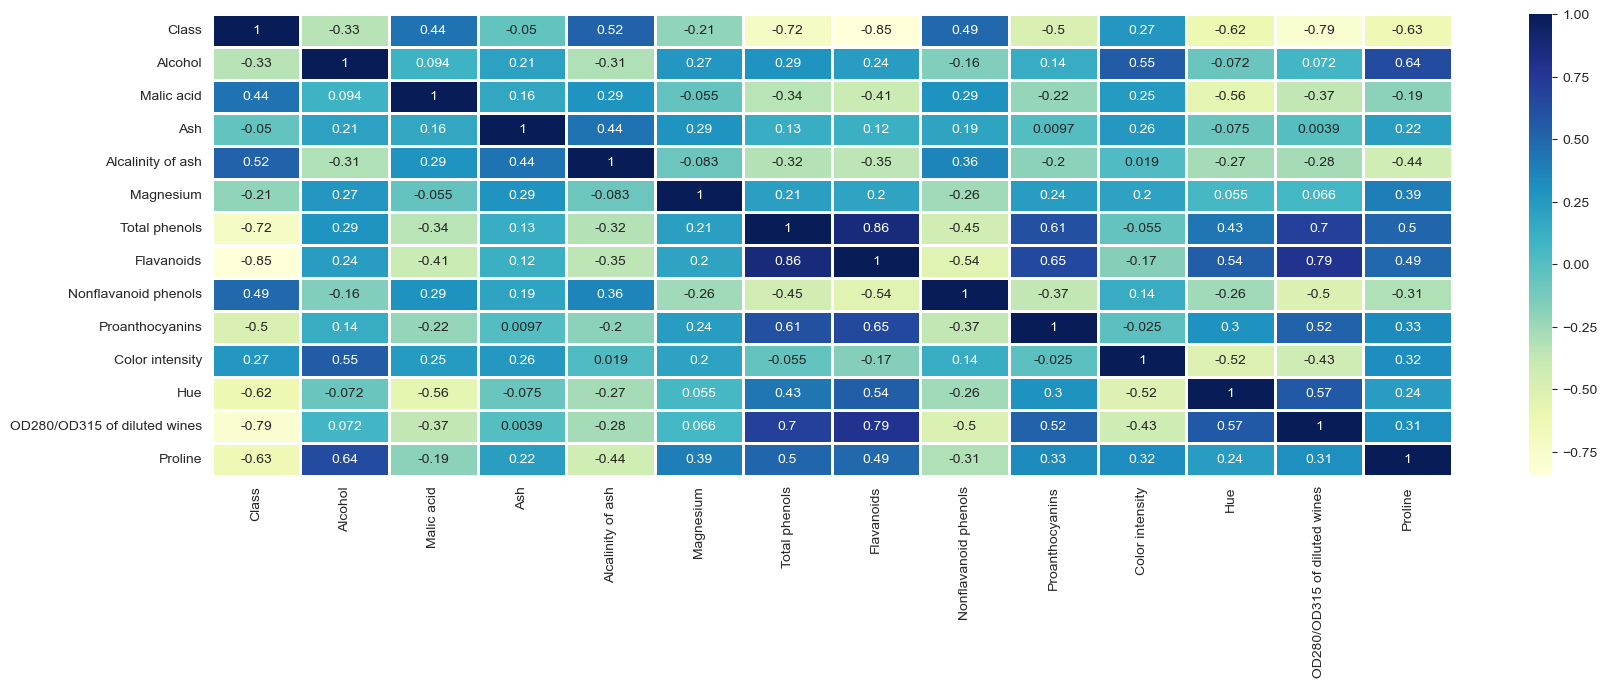

In [13]:
sns.heatmap(raw_data.corr(), annot=True, cmap="YlGnBu", linewidths=2, cbar=True)

Никакой из признаков особо не коррелирует с ЦП

Видим корреляцию между:
1. **flavanoids** и **total_phenols** (0.86)
2. **flavanoids** и **od280/od315_of_diluted_wines** (0.79)

### Распредление таргета

<Axes: xlabel='Class', ylabel='count'>

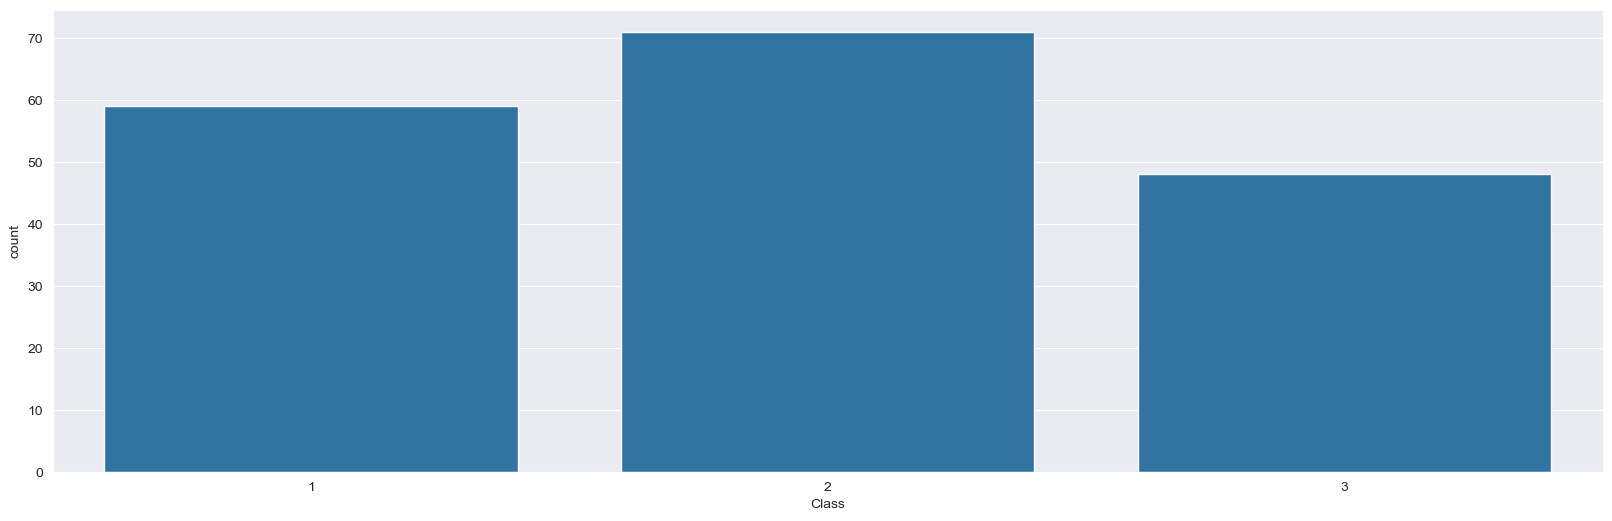

In [14]:
sns.countplot(raw_data, x="Class")

In [15]:
raw_data.Class.value_counts()

Class
2    71
1    59
3    48
Name: count, dtype: int64